Ce cahier numérique est à disposition sous licence CC-BY-NC-SA. Il a été écrit par Martin Vérot pour les étudiants en L3 de l'ENS de Lyon au sein du département Sciences de la matière. Cette activité vient en complément du [polycopié de cours](http://agregationchimie.free.fr/cours.php#incertitudes). 

[Distribution discrète](#galton)
* [pile ou face](#galton)
    * [tirage simple](#nvalue)
    * [tirages multiples](#pvalue)
    * [distribution gaussienne de la moyenne](#fitNorm)
    * [une expérience plus visuelle](#galtonvid)
* [Distribution binomiale](#binom)
* [Distribution de poisson](#poisson)

[Distributions continues](#continues)
* [Distribution rectangulaire](#continues)
    * [tirage simple](#rect1)
    * [tirages multiples](#rect2)
    * [distribution gaussienne de la moyenne](#rect3)
* [Distribution triangulaire](#triang)
    * [tirage simple](#triang1)
    * [tirages multiples et distribution gaussienne](#triang2)
* [Une distribution non symétrique : la distribution Gamma](#gamma)
    * [tirage simple](#gamma1)
    * [tirages multiples et distribution gaussienne](#gamma2)  
* [Une distribution qui ne vérifie pas le théorème central limite : distribution de Lorentz/Cauchy](#cauchy)

[Vitesse de la convergence](#convergence)


# Démonstration intuitive du théorème de la limite centrale

La distribussion gaussienne est au cœur des formules utilisées en métrologie. Et ce alors que bien souvent, les distributions des variables implicites ne sont pas forcément gaussiennes. Sans être rigoureux, le but de ce cahier est de montrer comment il est possible d'arriver à des variables de sortie gaussiennes pour des variables d'entrée qui ne le sont pas forcément.

On rappelle qu'une distribution gaussienne de valeur moyenne $\bar{z}$ et d'écart-type $\sigma$  est donnée par :
$$  G_{\bar{z},\sigma}(z)=\dfrac{1}{\sigma\sqrt{2\pi}}\exp\left( {-\dfrac{\left( z-\bar{z} \right)^{2}}{2\sigma^{2}}} \right)$$

## Distribution discrète : pile ou face, ou la planche de Galton
<span id="galton"></span>

L'idée est de partir du lancer d'une pièce en supposant qu'il y a 50% de chances de faire pile et 50% de chance de faire face. Le résultat pile correspond à un résultat de 1 tandis que face correspond à 0. 

Maintenant, au lieu de faire un unique tirage, l'idée est de faire une succession de $n$ tirages avec une valeur de $n$ relativement grande. Ensuite, nous allons additionner toutes les valeurs (le total est donc compris entre 0 et $n$) puis prendre la valeur moyenne pour avoir un résultat forcément compris entre 0 et 1 :
$$\bar{z}=f(z_1,...z_n)=\dfrac{1}{n}\sum_{i=1}^nz_i$$
<span id="nvalue"></span>

In [1]:
import numpy as np
n = 100
#Ici, on choisit de faire un tirage de n=100 valeurs
premier_tirage = np.random.randint(2, size=n)
print('{} tirages compris entre zéro et un'.format(n))
print(premier_tirage)
#on additionne les n valeurs et on prend la moyenne
z0 = np.sum(premier_tirage)/n
print('la valeur moyenne correspondante est : {:.2f}'.format(z0))

100 tirages compris entre zéro et un
[0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0]
la valeur moyenne correspondante est : 0.55


Normalement, le résultat final devrait être proche de 0,5 mais pas forcément égal. N'hésitez pas à ré-exécuter le code ci-dessus pour voir que la valeur obtenue n'est pas fixe.

Maintenant, nous allons répeter cette opération $p$ fois pour observer la distribution des résultats.<span id="pvalue"></span>

"\nRelancer le tirage plusieurs fois, puis changer la valeur de p pour voir son influence.\n\n\nPour ré-éxecuter le code, appuyer sur la touche 'haut' puis sur 'Shift+Enter'\n"

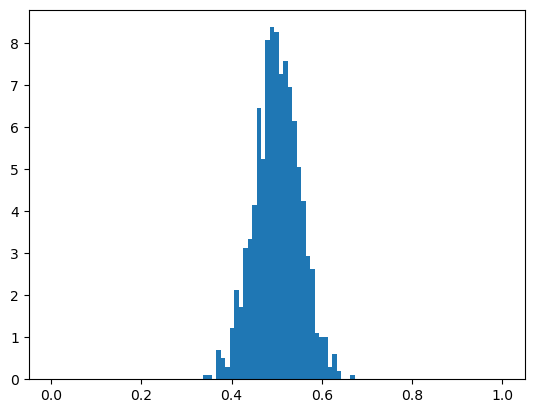

In [2]:
p = 1000
zs = np.sum(np.random.randint(2, size=(n,p)), axis = 0 )/n

#print('les {} résultats obtenus :'.format(p)) 
#print(zs) 
#si on veut vérifier le fait qu'il y ait bien 10000 résultats
#print(zs.shape) 


"""
Nous allons maintenant tracer la distribution des résultats pour les différentes valeurs moyennes trouvées.
"""

import matplotlib as mpl
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(zs,bins=101,range=(0.,1.),density=True)
"""
Relancer le tirage plusieurs fois, puis changer la valeur de p pour voir son influence.


Pour ré-éxecuter le code, appuyer sur la touche 'haut' puis sur 'Shift+Enter'
"""


Pour $p=1000$, la distribution des résultats peut avoir une forme « bizarroïde », mais pour 10 000, 100 000 ou 1 million de tirages, la distribution devient très stable et tend vers une courbe qui est ... la distribution gaussienne. Il est intéressant d'essayer de faire le lien entre les différentes valeurs du problème et la distribution gaussienne correspondante. Il faut donc trouver la valeur moyenne et la variance des différentes valeurs.
<span id="fitNorm"></span>

In [3]:
#Moyenne de la distribution
moyenne = np.average(zs)
#variance de la distribution
variance = np.var(zs,ddof=1)
ecartType= np.std(zs,ddof=1)
print('moyenne: {} variance : {} écart-type : {}'.format(moyenne, variance,ecartType))

moyenne: 0.50119 variance : 0.002541825725725726 écart-type : 0.050416522348588524


Il est possible de comparer les valeurs obtenues aux valeurs théoriques. La valeur moyenne théorique est de 0,5. Pour l'écart-type, cela demande un peu plus de travail, il faut commencer par calculer la variance :
$$\begin{align}
V(z_i)={}&=\dfrac{1}{2}\sum_{j=1}^2(z_j-\bar{z})^2=0,25\\
V(\bar{z})={}&\dfrac{1}{n} \sum_{j=1}^n V(z_i) =\dfrac{1}{n} \times 0,25 \\
\sigma_\bar{z} ={}& \sqrt{V(\bar{z})} = \dfrac{\sigma_{z_i} }{\sqrt{n}}
\end{align}$$
Numériquement, les deux résulats calculés ci-dessus à partir de la distribution théorique doivent être proches de ceux trouvés numériquement.


**De plus, ce résultat est intéressant car on peut voir que la variance sur la valeur moyenne $\bar{z}$ décroit en $\frac{1}{n}$, donc plus l'opération de moyenne se fait sur un grand échantillon, plus l'incertitude-type sur la valeur moyenne sera faible.** C'est un résultat très important en métrologie : plus l'échantillonage est grand, plus la valeur moyenne est connue avec une incertitude-type faible et ce quelle que soit l'incertitude-type sur les $z_i$.

Il est possible de « confirmer » ce résultat en changeant la valeur de $n$ [ci-dessus](#nvalue).

Maintenant que l'on a déterminé les valeurs de la gaussienne théorique correspondant à partir de la valeur moyenne et de son incertitude-type, il est possible de superposer les deux pour comparer les résultats. Normalement, plus la valeur de $p$ définie [ci-dessus](#pvalue) est grande, plus les deux grandeurs doivent être proches.

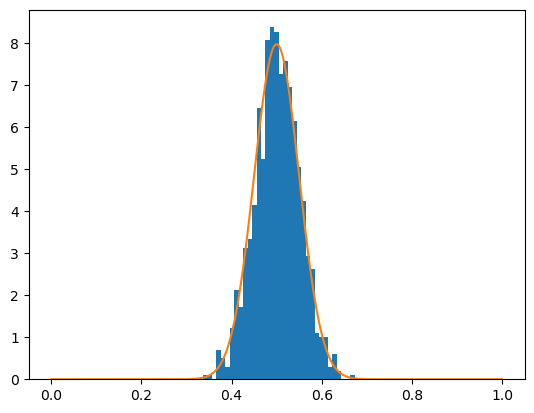

In [4]:
#Tracé de l'histogramme
plt.hist(zs,bins=101,range=(0.,1.),density=True)
#Tracé de la gaussienne correspondant
xs=np.linspace(0,1,1000)
from scipy.stats import norm
plt.plot(xs, norm.pdf(xs,loc=0.5,scale=np.sqrt(0.25/n) ) )

<span id="galtonvid"></span>
On vient de « montrer » indirectement qu'une distribution binomiale tend vers une distribution gaussienne. C'est visualisable avec la planche de Galton (vidéo ci-dessous) où le nombre de rangées de pics correspon à la valeur de $n$ et le nombre de billes à la valeur de $p$. L'indice de la colonne étant la valeur moyenne.

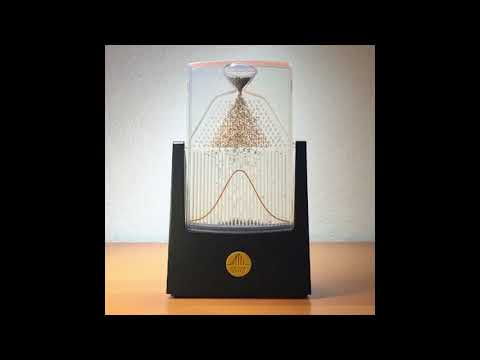

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('EvHiee7gs9Y', width=600, height=400)

<span id="binom"></span>
### Généralisation pour une distribution binomiale
La loi binomiale correspond à la probabilité d'avoir le résultat $k$ après avoir effectué $q$ tirages avec une probabilité de réussite de $r$ (en supposant qu'une réussite donne 1 et un échec 0). Si $r=0,5$, on retombe sur le cas précédent de la pièce lancée $q$ fois.

$$\mathbb{P}_{\mathcal{B}_{q,r}}(X=k)=\begin{pmatrix}
q \\ 
k
\end{pmatrix} r^k(1-r)^{q-k}$$
$$\mathbb{E}_{\mathcal{B}_{q,r}}=qr \qquad\qquad V_{\mathcal{B}_{q,r}} = qr(1-r) \qquad\qquad \sigma_{\mathcal{B}_{q,r}} = \sqrt{qr(1-r)}$$

la valeur moyenne correspondante est : 5.16


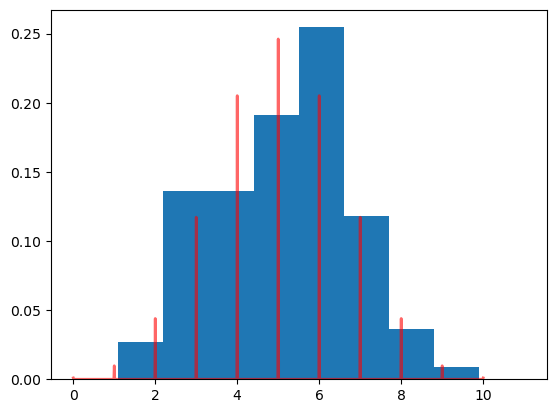

In [6]:
from scipy.stats import binom
q=10 #nombre de tirage dans la distribution binomiale
r=0.5 #probabilité de succès
n=100 #nombre de tirage dans la distribution binomiale pour faire la moyenne
p=1000 #nombre de moyennes calculées

premier_tirage = binom.rvs(q,r,size=n)
count, bins, ignored = plt.hist(premier_tirage,bins=q,range=(0.,q+1),density=True)
#affichage de la fonction de distribution théorique
xs = np.linspace(0,q,1001)
plt.plot(xs, binom.pmf(xs,q,0.5),'r-', lw=2, alpha=0.6)
#on additionne les n valeurs et on prend la moyenne
z0 = np.sum(premier_tirage)/n
print('la valeur moyenne correspondante est : {:.2f}'.format(z0))

échantilloné moyenne: 5.000 variance : 0.025 écart-type : 0.158
théorique    moyenne: 5.000 variance : 0.025 écart-type : 0.158


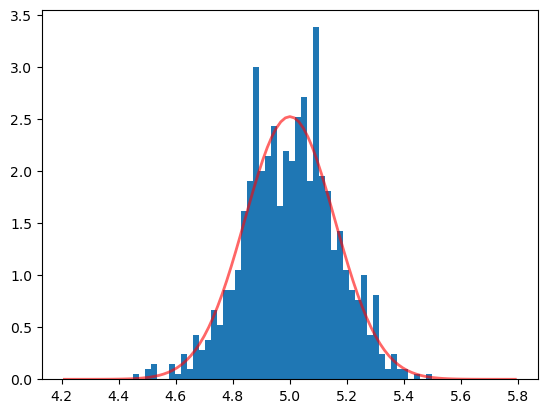

In [7]:
#on répète maintenant l'opération p fois
zs = np.sum(binom.rvs(q,r,size=(n,p)), axis=0)/n
#Moyenne de la distribution
moyenne = np.average(zs,axis=0)
#variance de la distribution
variance = np.var(zs,ddof=1,axis=0)
ecartType= np.std(zs,ddof=1,axis=0)
#Tracé de l'histogramme
plt.hist(zs,bins=50,range=(np.min(zs),np.max(zs)),density=True)
#Tracé de la gaussienne correspondant
xs = np.linspace(q*r-5* np.sqrt((q/n)*r*(1-r)),q*r+5*np.sqrt((q/n)*r*(1-r)),n+1)
plt.plot(xs, norm.pdf(xs,q/2,np.sqrt((q/n)*r*(1-r))),'r-', lw=2, alpha=0.6)

print('échantilloné moyenne: {:.3f} variance : {:.3f} écart-type : {:.3f}'.format(moyenne, variance,ecartType))
print('théorique    moyenne: {:.3f} variance : {:.3f} écart-type : {:.3f}'.format(q/2, (q/n)*r*(1-r),np.sqrt((q/n)*r*(1-r)) ) )

<span id="poison"></span>
### Pour la distribution de poisson

La distribution de Poisson est utile pour décrire les événements rares, dont la probabilité est indépendante de l'événement précédent. Cette distribution correspond à une distribution binomiale pour laquelle on a $qr = \mu$ avec $q$ plutôt grand et $r$ petit.

$$\mathbb{P}_{\mathcal{P}_{\mu}}(X=k)=\dfrac{\mu^k}{k!}\mathrm{e}^{-\mu}$$
$$\mathbb{E}_{\mathcal{P}_{\mu}}=\mu \qquad\qquad V_{\mathcal{P}_{\mu}} = \mu \qquad\qquad \sigma_{\mathcal{P}_{\mu}} = \sqrt{\mu}$$
Si on a 4 désintégration nucléaire qui a lieu en moyenne toutes les 5 minutes et que l'on fait une observation toutes les 15 minutes, on prendra comme valeur pour $\mu=4\times 3=12$.

la valeur moyenne correspondante est : 1.03


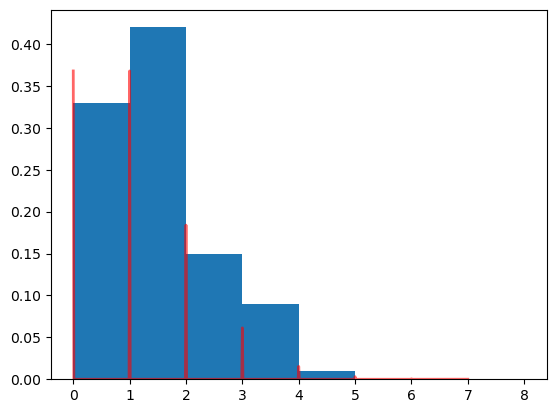

In [8]:
from scipy.stats import poisson
n=100
p=1000
mu=1
premier_tirage = poisson.rvs(mu,size=n)
count, bins, ignored = plt.hist(premier_tirage,range=(0,8),bins=8,density=True)
#affichage de la fonction de distribution théorique
xs = np.linspace(0,7,701)
plt.plot(xs, poisson.pmf(xs,mu),'r-', lw=2, alpha=0.6)
#on additionne les n valeurs et on prend la moyenne
z0 = np.sum(premier_tirage)/n
print('la valeur moyenne correspondante est : {:.2f}'.format(z0))

échantilloné moyenne: 1.001 variance : 0.010 écart-type : 0.099
théorique    moyenne: 1.000 variance : 0.010 écart-type : 0.100


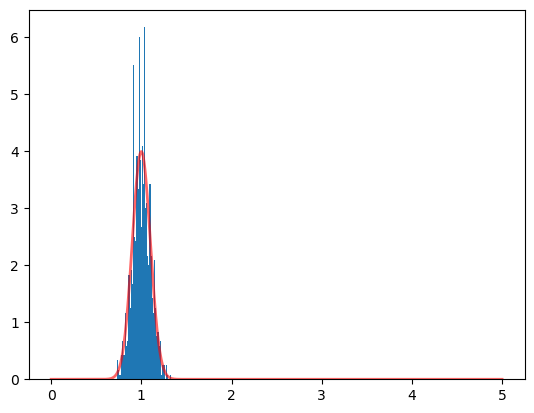

In [9]:
#on répète maintenant l'opération p fois
zs = np.sum(poisson.rvs(mu,size=(n,p)), axis=0)/n
#Moyenne de la distribution
moyenne = np.average(zs,axis=0)
#variance de la distribution
variance = np.var(zs,ddof=1,axis=0)
ecartType= np.std(zs,ddof=1,axis=0)
#Tracé de l'histogramme
plt.hist(zs,bins=50,range=(np.min(zs),np.max(zs)),density=True)
#Tracé de la gaussienne correspondant
xs = np.linspace(0,5,1001)
plt.plot(xs, norm.pdf(xs,mu,np.sqrt(mu/n)),'r-', lw=2, alpha=0.6)
print('échantilloné moyenne: {:.3f} variance : {:.3f} écart-type : {:.3f}'.format(moyenne, variance,ecartType))
print('théorique    moyenne: {:.3f} variance : {:.3f} écart-type : {:.3f}'.format(mu, mu/n,np.sqrt(mu/n) ) )

## Cas des distributions continues
<span id="continues"></span>
### Distribution rectangulaire
Au lieu de prendre une distribution discrète, on va maintenant prendre une distribution continue : la distribution rectangulaire. 

La densité de probabilité est donné par :
$$\begin{align}
\rho(z) ={}& \dfrac{1}{b-a} \qquad\qquad a\leqslant x<b\\
={}&0 \qquad\qquad\qquad \text{sinon}
\end{align}$$
$$\bar{z}=\dfrac{a+b}{2}\qquad\qquad V = \dfrac{(b-a)^2}{12}\qquad\qquad \sigma=\dfrac{(b-a)}{2\sqrt{3}}$$
Pour l'exemple, on prend un distribution uniforme sur l'intervalle $[0,1[$.

<br>
<details>
  <summary> ** Cliquer pour voir le calcul de la variance **</summary> 
   La valeur moyenne de la distribution théorique est toujours simple à calculer : $0,5$. Par contre, pour la variance, il faut utiliser le résultat liant la largeur d'une distribution rectangulaire à son écart type :
$$\begin{align}V(z_i) ={}&\dfrac{1}{b-a} \int_a^b (z-\bar{z})^2\mathrm{d}\,z = \dfrac{1}{b-a}\int_a^b \left(z-\dfrac{a+b}{2}\right)^2\mathrm{d}\,z\\
\text{on pose le changement de variable $u=z-\dfrac{a+b}{2}$}\\
={}&\dfrac{1}{b-a} \int_{\frac{a-b}{2}}^{\frac{b-a}{2}} u^2\mathrm{d}\,u = \dfrac{1}{b-a} \left[\dfrac{u^3}{3}\right]_{\frac{a-b}{2}}^{\frac{b-a}{2}} = \dfrac{\left(b-a\right)^2}{12}\end{align}$$
dans notre cas, on a donc :
$$\begin{align}V(\bar{z})={}&\dfrac{1}{12n}\\
\sigma_\bar{z}={}& \dfrac{1}{\sqrt{12n}}=\dfrac{1}{2\sqrt{3}}\dfrac{1}{\sqrt{n}}
\end{align}$$
</details>    



<span id="rect1"></span>

la valeur moyenne correspondante est : 0.53


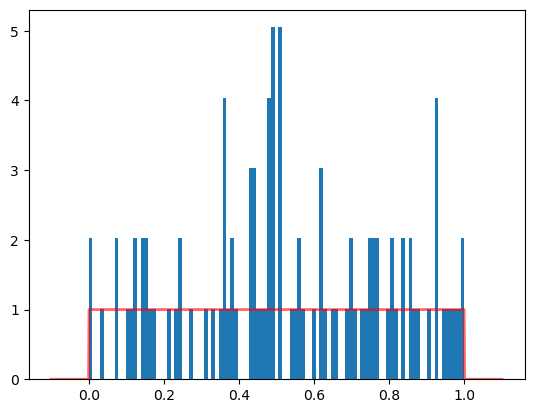

In [10]:
from scipy.stats import uniform
n=100
p=1000
#Ici, on choisit de faire un tirage de n valeurs
premier_tirage = uniform.rvs(0.,1., size=n)
plt.hist(premier_tirage,bins=101,range=(0.,1.),density=True)
#affichage de la fonction de distribution théorique
xs = np.linspace(-0.1,1.1,1000)
plt.plot(xs, uniform.pdf(xs,loc=0.,scale=1),'r-', lw=2, alpha=0.6, label='distribution uniforme')

#on additionne les n valeurs et on prend la moyenne
z0 = np.sum(premier_tirage)/n
print('la valeur moyenne correspondante est : {:.2f}'.format(z0))

échantilloné moyenne: 0.49854 variance : 0.00165 écart-type : 0.04067
théorique    moyenne: 0.50000 variance : 0.00167 écart-type : 0.04082


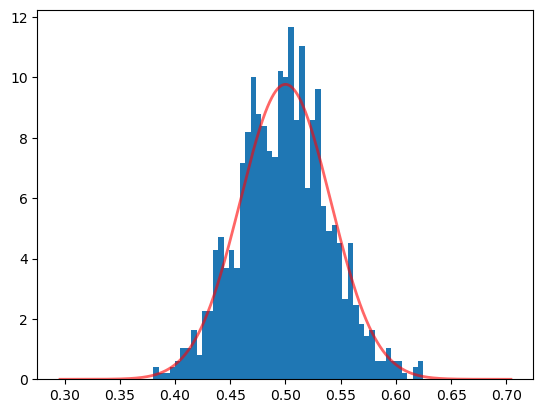

In [25]:
#on répète maintenant l'opération p fois
zs = np.sum(uniform.rvs(0.,1.,size=(n,p)), axis=0)/n
#Moyenne de la distribution
moyenne = np.average(zs,axis=0)
#variance de la distribution
variance = np.var(zs,ddof=1,axis=0)
ecartType= np.std(zs,ddof=1,axis=0)
#Tracé de l'histogramme
plt.hist(zs,bins=50,range=(np.min(zs),np.max(zs)),density=True)
#Tracé de la gaussienne correspondant
xs = np.linspace(0.5-5*1/(np.sqrt(12*n)),0.5+5*1/(np.sqrt(12*n)),1001)
plt.plot(xs, norm.pdf(xs,loc=0.5,scale=1/(np.sqrt(12*n)) ),'r-', lw=2, alpha=0.6)
print('échantilloné moyenne: {:.5f} variance : {:.5f} écart-type : {:.5f}'.format(moyenne, variance,ecartType))
print('théorique    moyenne: {:.5f} variance : {:.5f} écart-type : {:.5f}'.format(0.5,1/((12*n)) ,1/(np.sqrt(12*n)) ))

Encore une fois, on voit que pour une distribution uniforme, on tend vers une distribution gaussienne pour la moyenne de $n$ valeurs -- comme dans le cas précédent. Le plus compliqué étant de calculer la valeur de $V(z_i)$ (ou $\sigma_{z_i}$) pour chaque cas.

<span id="triang"></span>

### Distribution triangulaire
Il suffit de faire la même chose en adaptant la distribution et le lien entre la variance/écart-type et la distribution.
<span id="triang1"></span>

$$\begin{equation}
 T_{\bar{z},\sigma}(z)=
 \begin{cases}
     \dfrac{1}{\Delta z^{2}}\left( z-\left( \bar{z}-\dfrac{\Delta z}{2} \right) \right) \quad\quad\quad \bar{z}-\dfrac{\Delta z}{2}\leqslant z \leqslant \bar{z}\\
     \dfrac{1}{\Delta z^{2}}\left( \left( \bar{z}+\dfrac{\Delta z}{2} \right) -z\right) \quad\quad\quad \bar{z}\leqslant z \leqslant \bar{z}+\dfrac{\Delta z}{2}
    \end{cases}
\end{equation}$$

Pour une distribution triangulaire centrée en $\bar{z}$ de largeur totale $\Delta z$

la valeur moyenne correspondante est : 0.48


"pour mieux voir le fait de tirer dans une distribution triangulaire,\n il est possible d'augmenter la valeur de n temporairement"

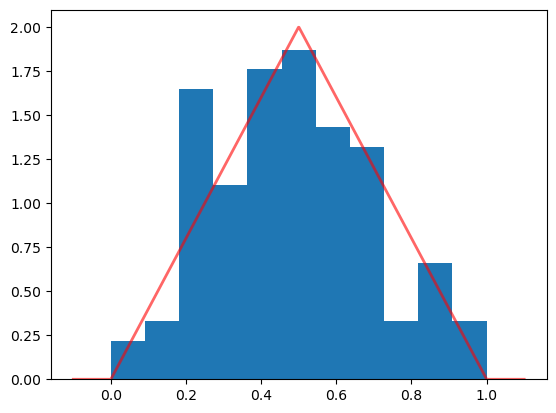

In [12]:
from scipy.stats import triang
n=100
p=1000

#Ici, on choisit de faire un tirage de n valeurs
premier_tirage = triang.rvs(0.5,loc=0,scale=1, size=n)
plt.hist(premier_tirage,bins=n//10+1,range=(0.,1.),density=True)
#affichage de la fonction de distribution théorique
xs = np.linspace(-0.1,1.1,1000)
plt.plot(xs, triang.pdf(xs,0.5,loc=0,scale=1),'r-', lw=2, alpha=0.6, label='distribution uniforme')
#on additionne les n valeurs et on prend la moyenne
z0 = np.sum(premier_tirage)/n
print('la valeur moyenne correspondante est : {:.2f}'.format(z0))
"""pour mieux voir le fait de tirer dans une distribution triangulaire,
 il est possible d'augmenter la valeur de n temporairement"""

Et comme précédemment, on peut faire $p$ tirages puis chercher la fonction gaussienne correspondante à partir de la valeur moyenne et de l'écart-type.
<span id="triang2"></span>

échantilloné moyenne: 0.50101 variance : 0.00042 écart-type : 0.02055
théorique    moyenne: 0.50000 variance : 0.00042 écart-type : 0.02041


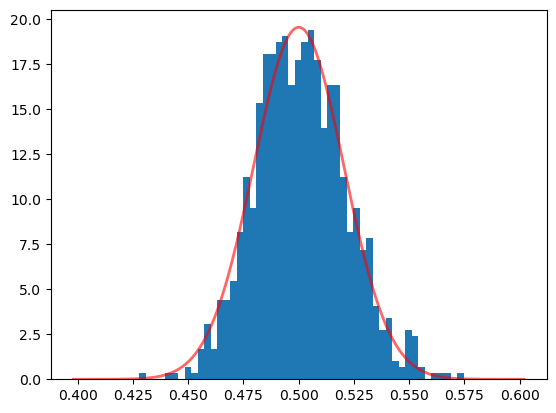

In [13]:
#on répète maintenant l'opération p fois
zs = np.sum(triang.rvs(0.5,loc=0,scale=1,size=(n,p)), axis=0)/n
#Moyenne de la distribution
moyenne = np.average(zs,axis=0)
#variance de la distribution
variance = np.var(zs,ddof=1,axis=0)
ecartType= np.std(zs,ddof=1,axis=0)
#Tracé de l'histogramme
plt.hist(zs,bins=50,range=(np.min(zs),np.max(zs)),density=True)
#Tracé de la gaussienne correspondant
xs = np.linspace(0.5-5*1/(np.sqrt(24*n)),0.5+5*1/(np.sqrt(24*n)),1001)
plt.plot(xs, norm.pdf(xs,loc=0.5,scale=1/(np.sqrt(24*n)) ),'r-', lw=2, alpha=0.6)
print('échantilloné moyenne: {:.5f} variance : {:.5f} écart-type : {:.5f}'.format(moyenne, variance,ecartType))
print('théorique    moyenne: {:.5f} variance : {:.5f} écart-type : {:.5f}'.format(0.5,1/((24*n)) ,1/(np.sqrt(24*n)) ))

<span id="gamma"></span>
### Distribution Gamma 
Jusqu'à présent, les distributions étudiées étaient symétriques et on pourrait se dire que c'est un cas particulier de distribution qui vérifient le théorème central limite. On va voir qu'en fait le théorème central limite marche quand même pour une distribution asymétrique.

La distribution gamma correspond à la fonction :
$$f(x,\alpha)=\dfrac{x^{a-1}\exp(-x)}{\Gamma(a)}$$

Où $\Gamma(a)$ est la *fonction* Gamma. 

Cette distribution permet de décrire la probabilité d'avoir un nombre donné d'occurences dans un intervalle de temps donné, la probababilité des événements observés étant constante.

la valeur moyenne correspondante est : 0.56


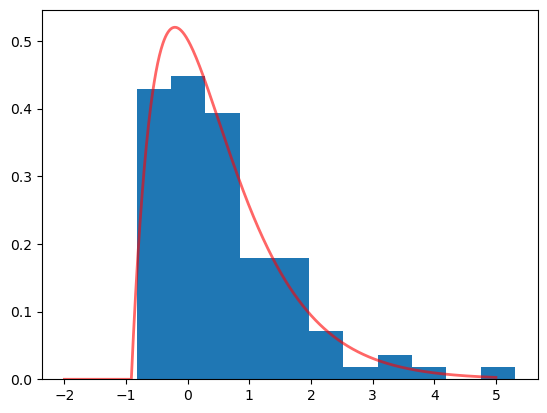

In [14]:
from scipy.stats import gamma
n=100
p=1000
first_draw = gamma.rvs(2,loc=0.5-np.sqrt(2),scale=1/np.sqrt(2), size=n)
plt.hist(first_draw,bins=n//10+1,density=True)
#plotting the theoretical distribution
xs = np.linspace(-2,5,1000)
plt.plot(xs, gamma.pdf(xs,2,loc=0.5-np.sqrt(2),scale=1/np.sqrt(2)),'r-', lw=2, alpha=0.6)

z0 = np.average(first_draw)
print('la valeur moyenne correspondante est : {:.2f}'.format(z0))

sample      average: 0.496 variance : 0.009 standard deviation : 0.096
theoretical average: 0.500 variance : 0.010 standard deviation : 0.100


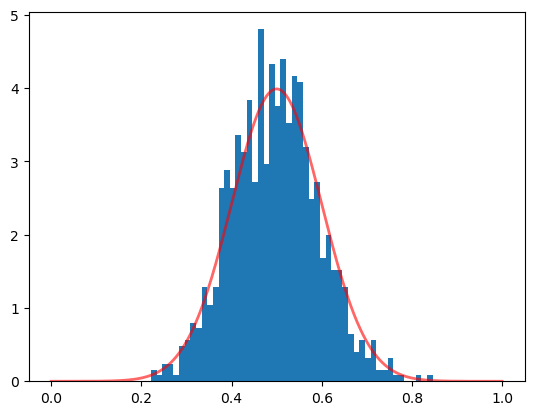

In [15]:
p=1000
n=100
#We now repeat it p times
zs = np.average(gamma.rvs(2,loc=0.5-np.sqrt(2),scale=1/np.sqrt(2),size=(n,p)), axis=0)
#average of the distribution
average = np.average(zs,axis=0)
#variance de la distribution
variance = np.var(zs,ddof=1,axis=0)
standardDeviation = np.std(zs,ddof=1,axis=0)
plt.hist(zs,bins=50,range=(np.min(zs),np.max(zs)),density=True)
#plotting the corresponding gaussian distribution
xs = np.linspace(0.5-5/np.sqrt(n),0.5+5/np.sqrt(n),1001)
plt.plot(xs, norm.pdf(xs,loc=0.5,scale=1/(np.sqrt(n)) ),'r-', lw=2, alpha=0.6)
print('sample      average: {:.3f} variance : {:.3f} standard deviation : {:.3f}'.format(average, variance,standardDeviation))
print('theoretical average: {:.3f} variance : {:.3f} standard deviation : {:.3f}'.format(0.5,1/n ,1/(np.sqrt(n)) ))

<span id="cauchy"></span>
### Une distribution qui ne vérifie pas le théorème central limite : distribution de Lorentz/Cauchy

Si on vient de voir qu'à priori quelle que soit la distribution initiale, on finit par avoir une distribution gaussienne de la moyenne. Il ne faut pas pour autant généraliser trop vite ! Il faut en effet que les variables $z_i$ ait une variance ou un écart-type qui soit défini. Si ce n'est pas le cas, alors la convergence n'est pas assurée. 

Nous allons le mettre en évidence avec une distribution de Cauchy/distribution de Lorentz. Cette distribution n'est pas « juste » une curiosité mathématique : elle décrit la distribution spectrale d'une raie d'émission d'un gaz soumis à des chocs, elle décrit aussi la forme des pics en diffraction des rayons X, etc.

la valeur moyenne correspondante est : 4.32


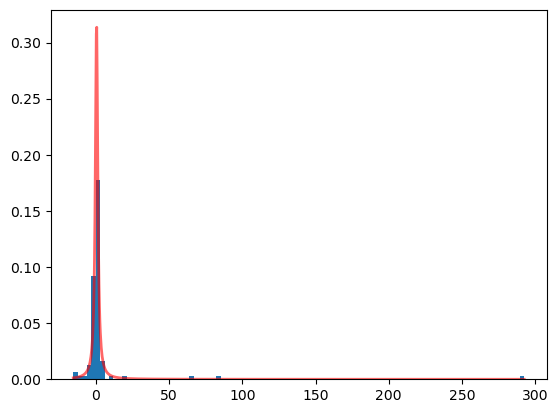

In [16]:
 #Ici, on choisit de faire un tirage de n valeurs
from scipy.stats import cauchy
premier_tirage = cauchy.rvs(loc=0.5,scale=1,size=n)
plt.hist(premier_tirage,bins=101,density=True)

#affichage de la fonction de distribution théorique
xs = np.linspace(np.min(premier_tirage),np.max(premier_tirage),1000)
plt.plot(xs, cauchy.pdf(xs,loc=0.5,scale=1),'r-', lw=2, alpha=0.6)
#on additionne les n valeurs et on prend la moyenne
z0 = np.sum(premier_tirage)/n
print('la valeur moyenne correspondante est : {:.2f}'.format(z0))

moyenne: 1.4516048139187692 variance : 549.4392344514386 écart-type : 23.440120188502416


"exécuter le code plusieurs fois pour voir qu'en plus de cela, ni la moyenne ni l'écart-type ne convergent"

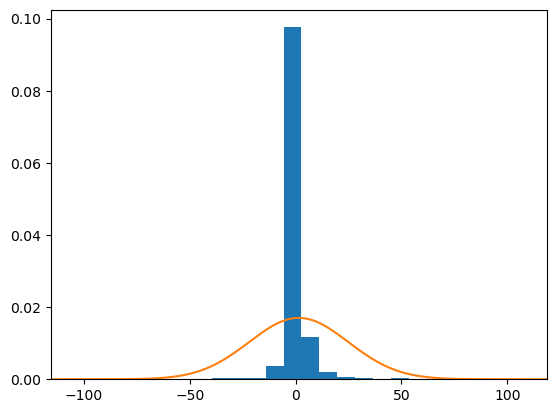

In [17]:
#on répète maintenant l'opération p fois
zs = np.sum(cauchy.rvs(loc=0.5,scale=1., size=(n,p)), axis = 0 )/n
#Moyenne de la distribution
moyenne = np.average(zs)
#variance de la distribution
variance = np.var(zs,ddof=1)
ecartType= np.std(zs,ddof=1)
print('moyenne: {} variance : {} écart-type : {}'.format(moyenne, variance,ecartType))
#Tracé de l'histogramme
plt.hist(zs,bins=101,range=(np.min(zs),np.max(zs)),density=True)
#Tracé de la gaussienne correspondant
xs=np.linspace(moyenne-5*ecartType,moyenne+5*ecartType,1000)
plt.plot(xs, norm.pdf(xs,loc=moyenne,scale=ecartType ) )
plt.xlim(moyenne-5*ecartType,moyenne+5*ecartType)
"""exécuter le code plusieurs fois pour voir qu'en plus de cela, ni la moyenne ni l'écart-type ne convergent"""

On peut comparer les données obtenues pour la loi de Cauchy par rapport à ce qu'on aurait avec une fonction qui vérifie le théorème central limite comme la distribution uniforme.

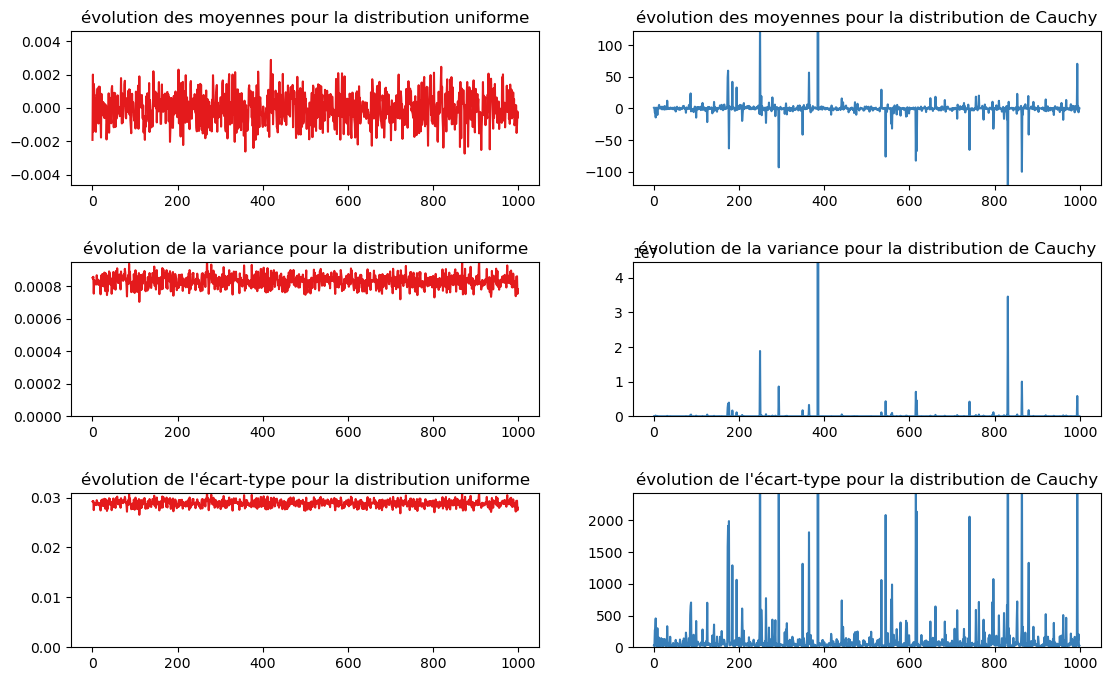

In [18]:
"""répétition sur 1000 distributions de p moyennes faites à partir de n tirages """
n=100
p=1000

distribs = ['uniforme','de Cauchy']
results = {'uniforme':{'color':'#e41a1c'},
          'de Cauchy':{'color':'#377eb8'}}


for distrib in distribs:
    if distrib == 'de Cauchy':
        zs = np.sum(cauchy.rvs(scale=1., size=(n,p,1000)), axis = 0 )/n
    elif distrib == 'uniforme':
        zs = np.sum(uniform.rvs(loc=-0.5,scale=1., size=(n,p,1000)), axis = 0 )/n
    results[distrib]['moyennes'] = np.average(zs,axis=0) #Moyenne de la distribution
    results[distrib]['variances'] = np.var(zs,ddof=1,axis=0) #variance de la distribution
    results[distrib]['ecartTypes'] = np.std(zs,ddof=1,axis=0) #ecart-type de la distribution
    ##Valeurs moyennes et écart-types pour les 1000 tirages de 1000 tirages
    results[distrib]['mmoyenne']   = np.average(results[distrib]['moyennes'])
    results[distrib]['emoyenne']   = np.std(results[distrib]['moyennes'],ddof=1)
    results[distrib]['mvariance']  = np.average(results[distrib]['variances'])
    results[distrib]['evariance']  = np.std(results[distrib]['variances'],ddof=1)
    results[distrib]['mecartType'] = np.average(results[distrib]['ecartTypes'])
    results[distrib]['eecartType'] = np.std(results[distrib]['ecartTypes'],ddof=1)

fig = plt.figure(figsize=(64,8))
gs = fig.add_gridspec(3, len(distrib),hspace=0.5)

xs = np.arange(p) #les xs correspondent à chacun des tirages
for (i,distrib) in enumerate(distribs):
    ax1 = fig.add_subplot(gs[0,i])
    #tracé de la moyenne sur 1000 tirages de 1000 tirages
    ax1.plot(xs,results[distrib]['moyennes'],color=results[distrib]['color'])
    ax1.set_ylim(results[distrib]['mmoyenne']-5*results[distrib]['emoyenne'],results[distrib]['mmoyenne']+5*results[distrib]['emoyenne'])
    ax1.set_title('évolution des moyennes pour la distribution {}'.format(distrib))
    #tracé de la variance sur 1000 tirages de 1000 tirages
    ax2 = fig.add_subplot(gs[1,i])
    ax2.plot(xs,results[distrib]['variances'],color=results[distrib]['color'])
    ax2.set_ylim(0,results[distrib]['mvariance']+3*results[distrib]['evariance'])
    ax2.set_title('évolution de la variance pour la distribution {}'.format(distrib))
    #tracé de l'écart-type sur 1000 tirages de 1000 tirages
    ax3 = fig.add_subplot(gs[2,i])
    ax3.plot(xs,results[distrib]['ecartTypes'],color=results[distrib]['color'])
    ax3.set_ylim(0,results[distrib]['mecartType']+3*results[distrib]['eecartType'])
    ax3.set_title('évolution de l\'écart-type pour la distribution {}'.format(distrib))

On peut voir que pour la distribution de Cauchy, les résultats ne sont pas stables du tout comparés à ceux obtenus pour la distribution rectangulaire. Cela est dû au fait que pour une distribution de Cauchy, les valeurs très éloignées de la valeur centrale ont une probabilité suffisante pour que lorsqu'une telle valeur est tirée, elle peut faire significativement bouger la moyenne et l'écart-type.

<span id="convergence"></span>
# Vitesse de la convergence
Nous avons vu que sur plusieurs exemples, la distribution de la moyenne convergeait vers la distribution gaussienne. Si on prend des distributions de tirage ayant toutes le même écart-type, l'écart-type de la moyenne converge à la même vitesse. 

On prend trois distribution différentes : la distribution uniforme, la distribution triangulaire et la distribution gaussienne. Toutes ces distributions sont prises de manière à avoir la même moyenne (égale à zéro) et le même écart-type (égal à 1).

In [19]:
ns = [1,3,5,10,15,30,50,100,500]
distribs = ['uniforme','triangulaire','gamma']
#distribs = ['uniforme']
results = {'uniforme':{'moyenne':[],'ecarttype':[],'zs':[],'color':'#e41a1c'},
          'triangulaire':{'moyenne':[],'ecarttype':[],'zs':[],'color':'#377eb8'},
          'gamma':{'moyenne':[],'ecarttype':[],'zs':[],'color':'#4daf4a'}}
p = 1000
sampling = 100
for n in ns:
    for distrib in distribs:
        """répétition sur 1000 distributions de p moyennes faites à partir de n tirages """
        if distrib == 'uniforme':
            zs = np.sum(uniform.rvs(loc=-np.sqrt(3),scale=2*np.sqrt(3), size=(n,p,sampling)), axis = 0 )/n
        elif distrib== 'triangulaire':
            zs = np.sum(triang.rvs(0.5,loc=-np.sqrt(6),scale=2*np.sqrt(6), size=(n,p,sampling)), axis = 0 )/n  
        elif distrib== 'gamma' :
            zs = np.sum(gamma.rvs(1,loc=0,scale=1., size=(n,p,sampling)), axis = 0 )/n-1
        #Moyennes de la distribution
        moyennes = np.average(zs,axis=0)
        #Écart-types de la distribution
        ecartTypes = np.std(zs,ddof=1,axis=0)
        results[distrib]['moyenne'].append(moyennes)
        results[distrib]['ecarttype'].append(ecartTypes)
        results[distrib]['zs'].append(zs)

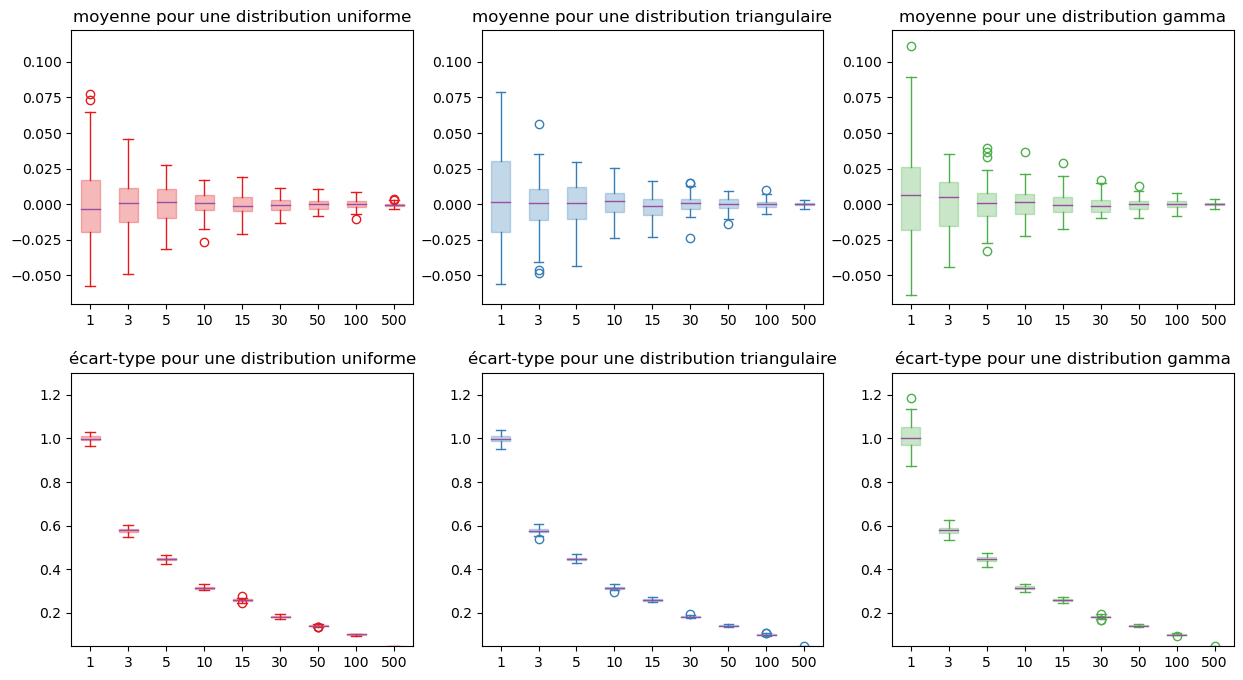

In [20]:
#affichage des différents graphiques

#pour avoir la même ordonnée pour pouvoir mieux comparer les différentes valeurs
minimum_moy = np.min([results['uniforme']['moyenne'],results['triangulaire']['moyenne'],results['gamma']['moyenne']])
maximum_moy = np.max([results['uniforme']['moyenne'],results['triangulaire']['moyenne'],results['gamma']['moyenne']])
minimum_et = np.min([results['uniforme']['ecarttype'],results['triangulaire']['ecarttype'],results['gamma']['ecarttype']])
maximum_et = np.max([results['uniforme']['ecarttype'],results['triangulaire']['ecarttype'],results['gamma']['ecarttype']])


fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2, len(distribs),hspace=0.25)  

for (i,distrib) in enumerate(distribs) :
    ax1 = fig.add_subplot(gs[0,i])
    ax1.set_title('moyenne pour une distribution {}'.format(distrib))
    #ax1.set_xscale('log')
    ax1.boxplot(results[distrib]['moyenne'],positions=range(len(ns)),labels=ns,patch_artist=True,boxprops=dict(alpha=.3,facecolor=results[distrib]['color'], color=results[distrib]['color']),
            capprops=dict(color=results[distrib]['color']),
            whiskerprops=dict(color=results[distrib]['color']),
            flierprops=dict(color=results[distrib]['color'], markeredgecolor=results[distrib]['color']),
            medianprops=dict(color='#984ea3'))
    ax1.set_ylim(1.1*minimum_moy,1.1*maximum_moy)
    ax2 = fig.add_subplot(gs[1,i])
    ax2.set_title('écart-type pour une distribution {}'.format(distrib))    
    #ax2.set_xscale('log')    
    ax2.boxplot(results[distrib]['ecarttype'],positions=range(len(ns)),labels=ns,patch_artist=True,boxprops=dict(alpha=.3,facecolor=results[distrib]['color'], color=results[distrib]['color']),
            capprops=dict(color=results[distrib]['color']),
            whiskerprops=dict(color=results[distrib]['color']),
            flierprops=dict(color=results[distrib]['color'], markeredgecolor=results[distrib]['color']),
            medianprops=dict(color='#984ea3'))
    ax2.set_ylim(1.1*minimum_et,1.1*maximum_et)

On peut vérifier cela en traçant les différentes distributions obtenues par échantillonage en fonction de la valeur de $n$ (en ligne), pour les trois distributions (en colonne : uniforme, triangulaire, gaussienne)

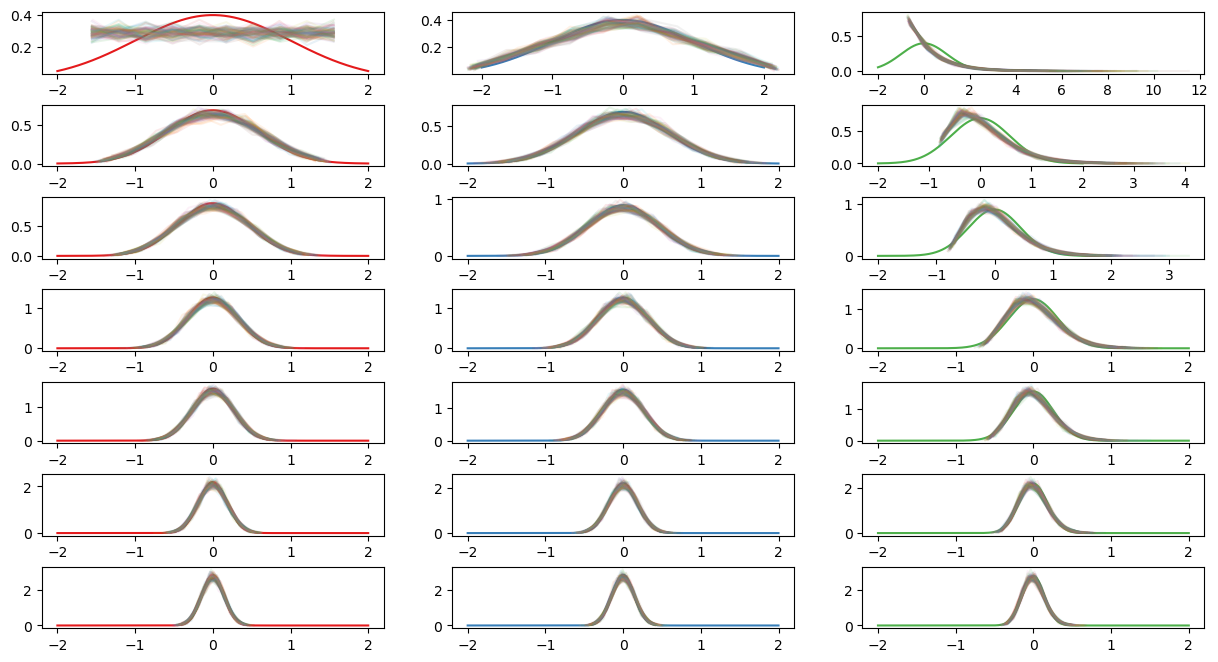

In [21]:
ns = [1,3,5,10,15,30,50]
xs = np.linspace(-2,2,1000)
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(len(ns), len(distribs),hspace=0.5)  
#affichage des différents graphiques
for (i,distrib) in enumerate(distribs) :
    for (l,n) in enumerate(ns):
        ax3 = fig.add_subplot(gs[l,i])
        ax3.plot(xs,norm.pdf(xs,0,1/np.sqrt(n)),alpha=1,color=results[distrib]['color'])
        for d in range(sampling):
            hist,bins = np.histogram(results[distrib]['zs'][l][:,d],density=True)
            ax3.plot((bins[:-1]+bins[1:])/2,hist,alpha=0.1)

Pour des distributions discrètes comme la distribution binomiale ou de poisson, les résultats sont analogues.

In [22]:
from scipy.stats import poisson
ns = [1,3,5,10,15,30,50,100,500]
distribs = ['binomiale','poisson']
#distribs = ['poisson']
results = {'binomiale':{'moyenne':[],'ecarttype':[],'zs':[],'color':'#e41a1c'},
          'poisson':{'moyenne':[],'ecarttype':[],'zs':[],'color':'#377eb8'}}
q=4
mu=1
p = 1000
sampling = 100
for n in ns:
    for distrib in distribs:
        """répétition sur 1000 distributions de p moyennes faites à partir de n tirages """
        if distrib == 'binomiale':
            zs = np.sum(binom.rvs(q,r,size=(n,p,sampling)), axis=0)/n-q/2
        elif distrib== 'poisson':
            zs = np.sum(poisson.rvs(mu,size=(n,p,sampling)), axis = 0 )/n-1
        #Moyennes de la distribution
        moyennes = np.average(zs,axis=0)
        #Écart-types de la distribution
        ecartTypes = np.std(zs,ddof=1,axis=0)
        results[distrib]['moyenne'].append(moyennes)
        results[distrib]['ecarttype'].append(ecartTypes )
        results[distrib]['zs'].append(zs )


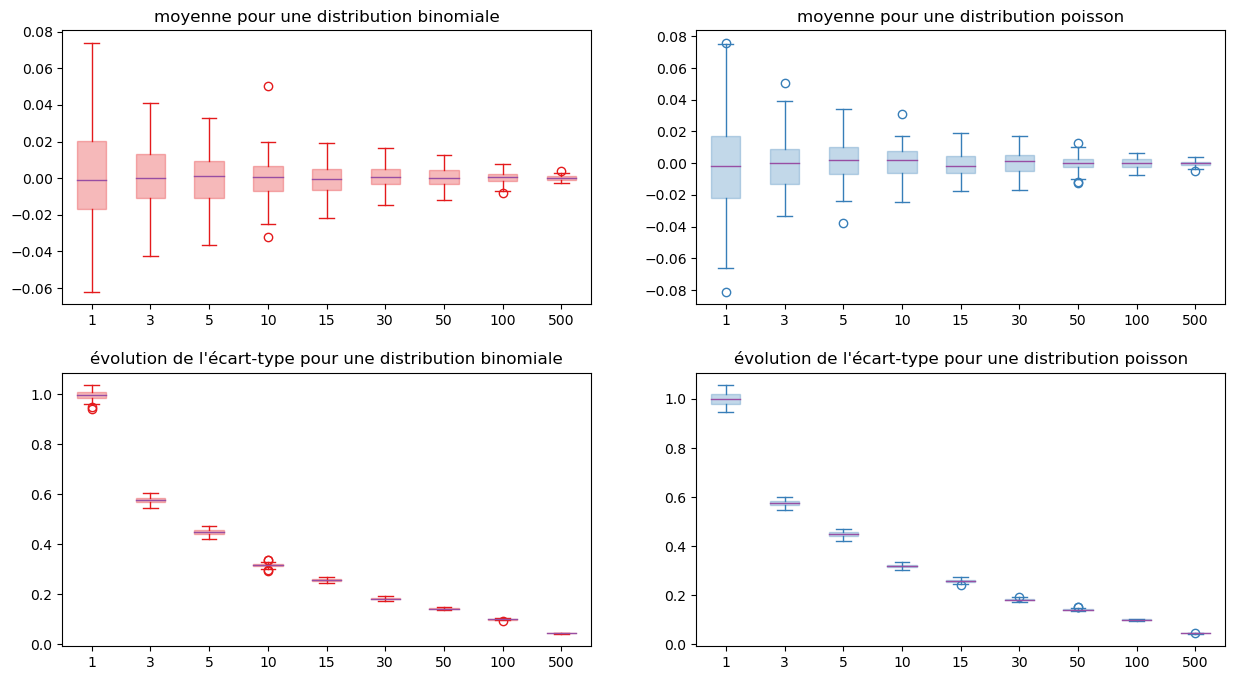

In [23]:
#affichage des différents graphiques
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2, len(distribs),hspace=0.25)  



for (i,distrib) in enumerate(distribs) :
    ax1 = fig.add_subplot(gs[0,i])
    ax1.set_title('moyenne pour une distribution {}'.format(distrib))
    #ax1.set_xscale('log')
    ax1.boxplot(results[distrib]['moyenne'],positions=range(len(ns)),labels=ns,patch_artist=True,boxprops=dict(alpha=.3,facecolor=results[distrib]['color'], color=results[distrib]['color']),
            capprops=dict(color=results[distrib]['color']),
            whiskerprops=dict(color=results[distrib]['color']),
            flierprops=dict(color=results[distrib]['color'], markeredgecolor=results[distrib]['color']),
            medianprops=dict(color='#984ea3'))
    #ax1.set_ylim(1.1*minimum_moy,1.1*maximum_moy)
    ax2 = fig.add_subplot(gs[1,i])
    ax2.set_title('évolution de l\'écart-type pour une distribution {}'.format(distrib))    
    #ax2.set_xscale('log')    
    ax2.boxplot(results[distrib]['ecarttype'],positions=range(len(ns)),labels=ns,patch_artist=True,boxprops=dict(alpha=.3,facecolor=results[distrib]['color'], color=results[distrib]['color']),
            capprops=dict(color=results[distrib]['color']),
            whiskerprops=dict(color=results[distrib]['color']),
            flierprops=dict(color=results[distrib]['color'], markeredgecolor=results[distrib]['color']),
            medianprops=dict(color='#984ea3'))

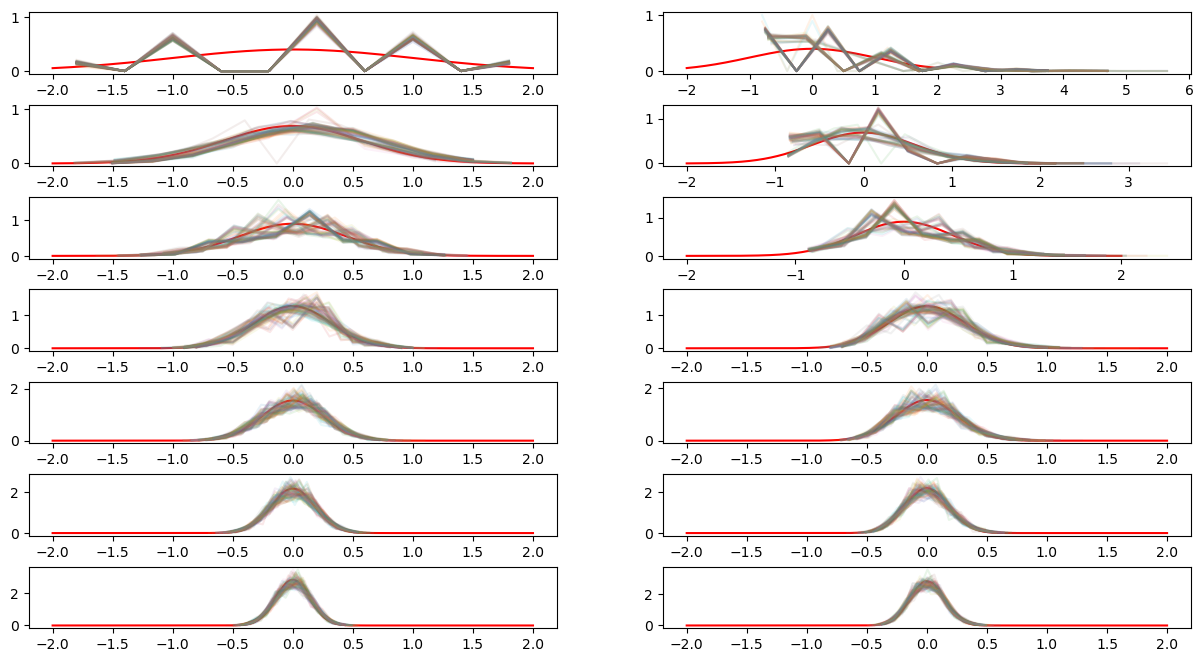

In [24]:
ns = [1,3,5,10,15,30,50]
xs = np.linspace(-2,2,1000)
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(len(ns), len(distribs),hspace=0.5)  
#affichage des différents graphiques
for (i,distrib) in enumerate(distribs) :
    for (l,n) in enumerate(ns):
        ax3 = fig.add_subplot(gs[l,i])
        ax3.plot(xs,norm.pdf(xs,0,1/np.sqrt(n)),alpha=1,color='red')
        for d in range(sampling):
            hist,bins = np.histogram(results[distrib]['zs'][l][:,d],density=True)
            ax3.plot((bins[:-1]+bins[1:])/2,hist,alpha=0.1)